# Classification

In [1]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('ggplot')
#plt.style.use('fivethirtyeight')
%matplotlib inline

***
# *TP 5* : ARBRES DE DECISIONS
## Exercice 4 : Arbres de décisions - scikit learn
### Question 4.1 : Prise en main

In [2]:
from sklearn import datasets

iris_data = datasets.load_iris()
datas = iris_data['data']
targets = iris_data['target']
names = iris_data['target_names']

In [3]:
# Cross validation de l'arbre de décision
from sklearn import tree
from sklearn.cross_validation import cross_val_score

clf = tree.DecisionTreeClassifier()

def cross_validation_real(n_folds,clf=clf):
    scores = list(cross_val_score(clf,datas,targets,cv = n_folds))
    scores_affichage = [str(round(score,3)) for score in scores]
    print(scores_affichage)
    print('Cross Val Score : {0}'.format(round(sum(scores)/len(scores),3)))

In [4]:
clf = tree.DecisionTreeClassifier(criterion = 'gini')
cross_validation_real(10)

['1.0', '0.933', '1.0', '0.933', '0.933', '0.867', '0.933', '1.0', '1.0', '1.0']
Cross Val Score : 0.96


In [5]:
clf = tree.DecisionTreeClassifier(criterion = 'entropy')
cross_validation_real(10)

['1.0', '0.933', '1.0', '0.933', '0.933', '0.867', '0.933', '1.0', '1.0', '1.0']
Cross Val Score : 0.96


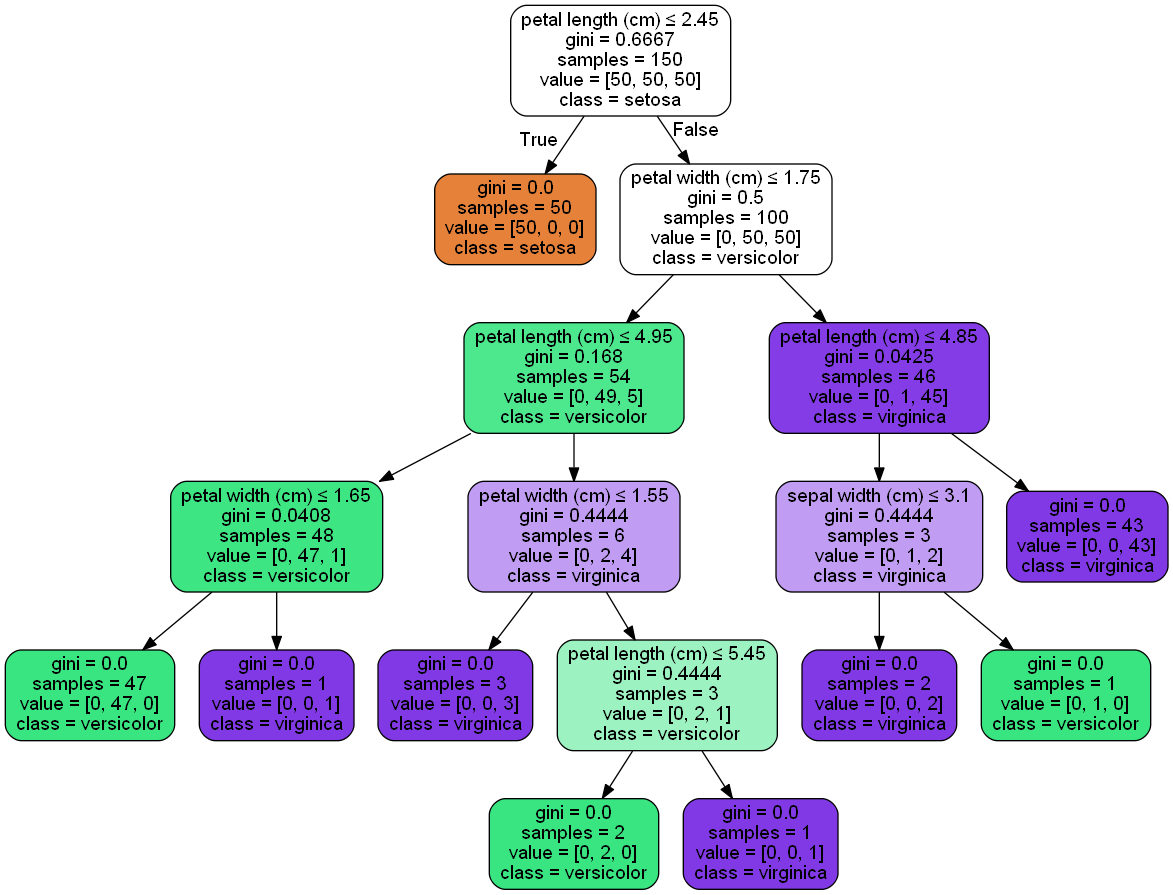

In [6]:
clf = tree.DecisionTreeClassifier()
clf.fit(datas,targets)

from IPython.display import Image
from sklearn.externals.six import StringIO  
import pydotplus as pydot

dot_data = StringIO() 
tree.export_graphviz(clf, out_file=dot_data,
                     feature_names=iris_data.feature_names,  
                     class_names=iris_data.target_names,  
                     filled=True, rounded=True,  
                     special_characters=True
                     )
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())
#graph.write_pdf("graph.pdf") 

### Question 4.2 : Influence des paramètres

Les paramètres changeables sont : 
- criterion : 'gini' ou 'entropy' sont les critères qui permettent de mesurer la qualité d'un élagage dans l'arbre
- max_depth : profondeur de l'arbre maximale, on arrête d'étendre à max_depth si une valeur est précisée
- min_sample_split : 2 par défaut, samples nécessaires pour séparer à un noeud
- max_features : le nombre de features à considérer quand on fait une décision à un noeud

In [15]:
# Avec le dataset DIGITS
digits_data = datasets.load_digits()
datas = digits_data.data
targets = digits_data.target
print(targets)

[0 1 2 ..., 8 9 8]


In [21]:
clf = tree.DecisionTreeClassifier()
print(cross_validation_real(10))

['0.784', '0.831', '0.818', '0.817', '0.777', '0.872', '0.883', '0.815', '0.847', '0.812']
Cross Val Score : 0.825
None


Environ 83% de précision avec les paramètres par défaut

#### Etude de la classification en fonction de la profondeur de l'arbre

Profondeur 1 : 0.198
Profondeur 2 : 0.312
Profondeur 3 : 0.427
Profondeur 4 : 0.545
Profondeur 5 : 0.62
Profondeur 6 : 0.713
Profondeur 7 : 0.747
Profondeur 8 : 0.777
Profondeur 9 : 0.786
Profondeur 10 : 0.773
Profondeur 11 : 0.78
Profondeur 12 : 0.783
Profondeur 13 : 0.779
Profondeur 14 : 0.784
Profondeur 15 : 0.784
Profondeur 16 : 0.777
Profondeur 17 : 0.779
Profondeur 18 : 0.778
Profondeur 19 : 0.786
Profondeur 20 : 0.777
Profondeur 21 : 0.782
Profondeur 22 : 0.781
Profondeur 23 : 0.783
Profondeur 24 : 0.791
Profondeur 25 : 0.782
Profondeur 26 : 0.785
Profondeur 27 : 0.777
Profondeur 28 : 0.778
Profondeur 29 : 0.783
Profondeur 30 : 0.778
Profondeur 31 : 0.78
Profondeur 32 : 0.789
Profondeur 33 : 0.781
Profondeur 34 : 0.783
Profondeur 35 : 0.783
Profondeur 36 : 0.783
Profondeur 37 : 0.779
Profondeur 38 : 0.781
Profondeur 39 : 0.778


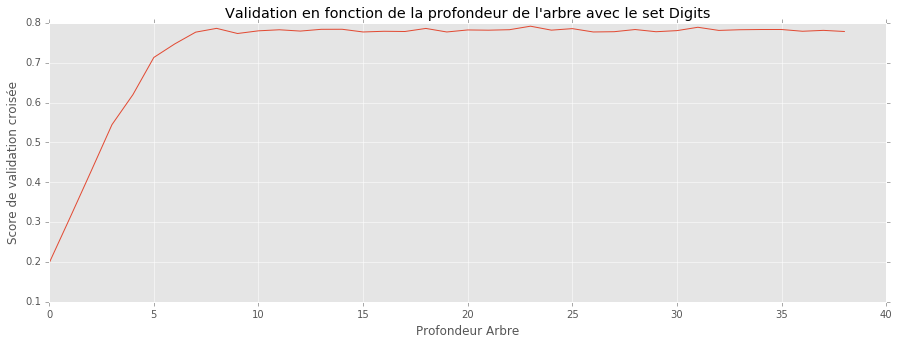

In [9]:
scores = []
for i in range(1,40):
    clf = tree.DecisionTreeClassifier(max_depth = i)
    score = list(cross_val_score(clf,datas,targets,cv = 5))
    score = sum(score)/len(score)
    scores += [score]
    print('Profondeur {0} : {1}'.format(i,round(score,3)))

plt.figure(figsize = (15,5))
plt.plot(scores)
plt.xlabel('Profondeur Arbre')
plt.ylabel('Score de validation croisée')
plt.title("Validation en fonction de la profondeur de l'arbre avec le set Digits")
plt.show()

Convergence assez rapide vers une précision de 80%

#### Etude de la classification en fonction de min_samples_split

Profondeur 2 : 0.779
Profondeur 3 : 0.785
Profondeur 4 : 0.781
Profondeur 5 : 0.784
Profondeur 6 : 0.783
Profondeur 7 : 0.777
Profondeur 8 : 0.778
Profondeur 9 : 0.78
Profondeur 10 : 0.775
Profondeur 11 : 0.768
Profondeur 12 : 0.77
Profondeur 13 : 0.77
Profondeur 14 : 0.763
Profondeur 15 : 0.764
Profondeur 16 : 0.767
Profondeur 17 : 0.767
Profondeur 18 : 0.762
Profondeur 19 : 0.763
Profondeur 20 : 0.768
Profondeur 21 : 0.765
Profondeur 22 : 0.758
Profondeur 23 : 0.747
Profondeur 24 : 0.75
Profondeur 25 : 0.754
Profondeur 26 : 0.751
Profondeur 27 : 0.745
Profondeur 28 : 0.748
Profondeur 29 : 0.745
Profondeur 30 : 0.745
Profondeur 31 : 0.747
Profondeur 32 : 0.746
Profondeur 33 : 0.747
Profondeur 34 : 0.742
Profondeur 35 : 0.744
Profondeur 36 : 0.738
Profondeur 37 : 0.735
Profondeur 38 : 0.747
Profondeur 39 : 0.738
Profondeur 40 : 0.74
Profondeur 41 : 0.744
Profondeur 42 : 0.743
Profondeur 43 : 0.743
Profondeur 44 : 0.736
Profondeur 45 : 0.742
Profondeur 46 : 0.742
Profondeur 47 : 0.737
P

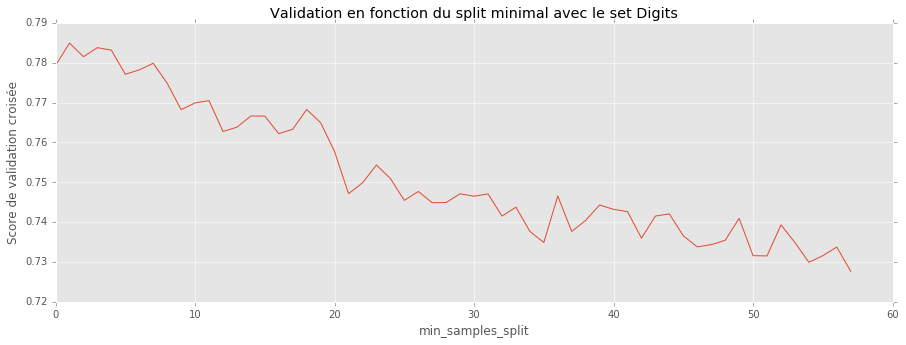

In [10]:
scores = []
for i in range(2,60):
    clf = tree.DecisionTreeClassifier(min_samples_split = i)
    score = list(cross_val_score(clf,datas,targets,cv = 5))
    score = sum(score)/len(score)
    scores += [score]
    print('Profondeur {0} : {1}'.format(i,round(score,3)))

plt.figure(figsize = (15,5))
plt.plot(scores)
plt.xlabel('min_samples_split')
plt.ylabel('Score de validation croisée')
plt.title("Validation en fonction du split minimal avec le set Digits")
plt.show()

La classification ne se faisant que sur 9 classes, nécessairement la précision diminue quand le minimum nécessaire augmente au delà

#### Etude de la classification en fonction du maximum de features

Profondeur 1 : 0.614
Profondeur 2 : 0.652
Profondeur 3 : 0.691
Profondeur 4 : 0.717
Profondeur 5 : 0.73
Profondeur 6 : 0.729
Profondeur 7 : 0.753
Profondeur 8 : 0.722
Profondeur 9 : 0.746
Profondeur 10 : 0.763
Profondeur 11 : 0.771
Profondeur 12 : 0.759
Profondeur 13 : 0.755
Profondeur 14 : 0.751
Profondeur 15 : 0.764
Profondeur 16 : 0.778
Profondeur 17 : 0.778
Profondeur 18 : 0.759
Profondeur 19 : 0.783
Profondeur 20 : 0.783
Profondeur 21 : 0.797
Profondeur 22 : 0.782
Profondeur 23 : 0.789
Profondeur 24 : 0.78
Profondeur 25 : 0.779
Profondeur 26 : 0.796
Profondeur 27 : 0.758
Profondeur 28 : 0.791
Profondeur 29 : 0.785
Profondeur 30 : 0.801
Profondeur 31 : 0.783
Profondeur 32 : 0.789
Profondeur 33 : 0.751
Profondeur 34 : 0.783
Profondeur 35 : 0.787
Profondeur 36 : 0.775
Profondeur 37 : 0.786
Profondeur 38 : 0.785
Profondeur 39 : 0.775
Profondeur 40 : 0.766
Profondeur 41 : 0.784
Profondeur 42 : 0.79
Profondeur 43 : 0.793
Profondeur 44 : 0.79
Profondeur 45 : 0.804
Profondeur 46 : 0.796
P

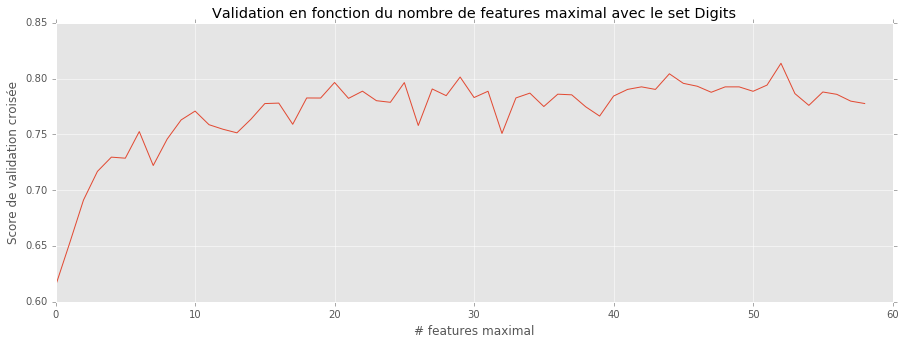

In [11]:
scores = []
for i in range(1,60):
    clf = tree.DecisionTreeClassifier(max_features = i)
    score = list(cross_val_score(clf,datas,targets,cv = 5))
    score = sum(score)/len(score)
    scores += [score]
    print('Profondeur {0} : {1}'.format(i,round(score,3)))

plt.figure(figsize = (15,5))
plt.plot(scores)
plt.xlabel('# features maximal')
plt.ylabel('Score de validation croisée')
plt.title("Validation en fonction du nombre de features maximal avec le set Digits")
plt.show()

A partir de 20 features, il semblerait que cela suffise environ pour classifier un digit